The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

As a test, I'll start by numerically calculating the DOS for a given dispersion, this helps to check the later results

Doing parabolic dispersion this we know must have a constant density of states so checks the function works.



[(0.0, 0.1)]

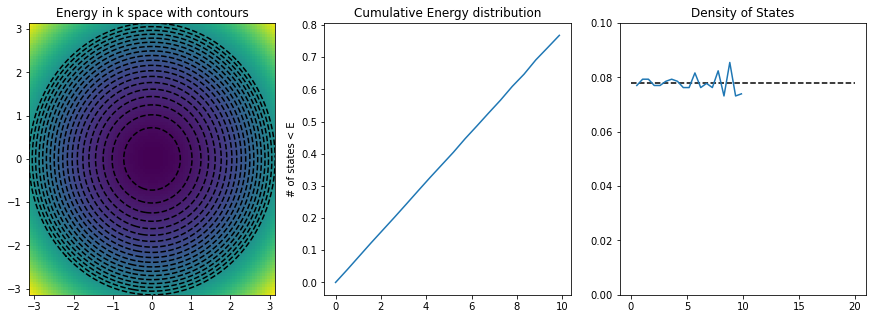

In [15]:
# %%
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
from munch import Munch
from scipy.linalg import eigvalsh

from QO.general import vec2

# %% calculate dispersion numerically
from QO.DOS import numerical_DOS
from QO.DOS import lattice_dispersion, parabolic_dispersion, linear_dispersion, parabolic_DOS, linear_DOS

N = vec2(100,100)
t = vec2(1,1)
print("""
As a test, I'll start by numerically calculating the DOS for a given dispersion, this helps to check the later results

Doing parabolic dispersion this we know must have a constant density of states so checks the function works.
""")
E, DOS, f, axes = numerical_DOS(parabolic_dispersion, N)
axes[2].hlines(y = 0.078, xmin = 0, xmax = 20, linestyle = '--')
axes[2].set(ylim = (0, 0.1))


Linear dispersion gives a linear density of states



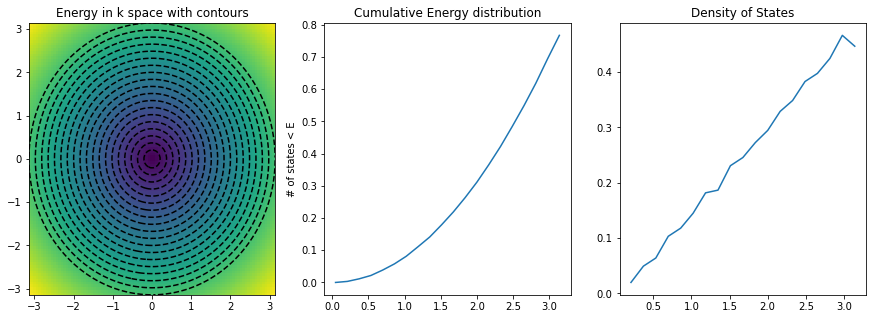

In [16]:
N = vec2(100,100)
t = vec2(1,1)
print("""
Linear dispersion gives a linear density of states
""")
E, DOS, _, _ = numerical_DOS(linear_dispersion, N)


Doing dispersion e(k) = -2t_x cos(k_x) - 2t_y cos(k_y)



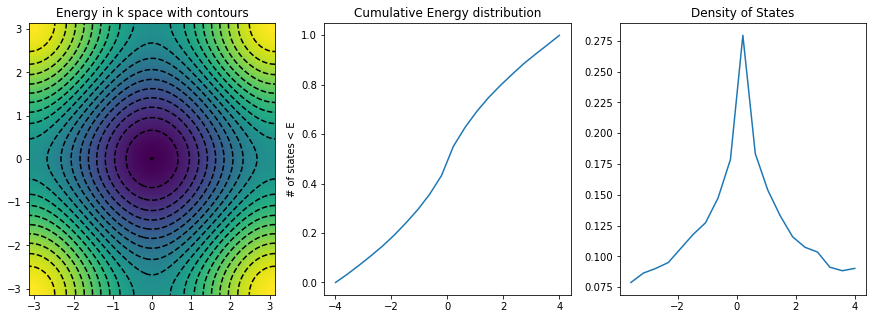

In [23]:
N = vec2(100,100)
t = vec2(1,1)

print("""
Doing dispersion e(k) = -2t_x cos(k_x) - 2t_y cos(k_y)
""")
lattice_E, lattice_DOS, f, axes = numerical_DOS(lattice_dispersion, N, limit_to_edges = False)

import pickle
pickle.dump((lattice_E, lattice_DOS), open( "dispersions.pickle", "wb" ))


Sanity check #1
If B -> 0 the dispersion should tend to e(k) = -2t_x cos(k_x) - 2t_y cos(k_y)
so I take the lattice with B = 0 and check that the DOS matches what we'd expect.
It looks like it does match pretty well



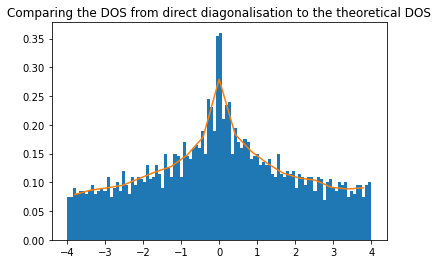

In [22]:
from QO.hamiltonians import k_space_H_no_field, eigs_over_k

print(
"""
Sanity check #1
If B -> 0 the dispersion should tend to e(k) = -2t_x cos(k_x) - 2t_y cos(k_y)
so I take the lattice with B = 0 and check that the DOS matches what we'd expect.
It looks like it does match pretty well
""")
params = Munch(
#hopping parameters in each direction
t = vec2(1,1),

#size of the magnetic unit cell in each direction, L_y = 2 and large L_x means small magenetic field
#L = vec2(200,1),

#the k_x and y in real space at which to evaluate the hamiltionian
k = vec2(0,0),

#the number of unit cells to tile in each direction
N = vec2(100, 100),
)  

eigs = eigs_over_k(k_space_H_no_field, **params)
plt.hist(eigs, bins = 100, density = 1);
plt.plot((lattice_E[1:] + lattice_E[:-1])/2, lattice_DOS)
plt.title("Comparing the DOS from direct diagonalisation to the theoretical DOS");